In [66]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [67]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [68]:
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
df = DataFrame(series.values)

In [69]:
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))


        mean   t-1  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


In [70]:
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()


In [71]:
for t in range(len(test)):
     length = len(history)
     yhat = np.mean([history[i] for i in range(length-window,length)])
     obs = test[t]
     predictions.append(yhat)
     history.append(obs)
     print('predicted=%f, expected=%f' % (yhat, obs))
     




predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


In [72]:
error = mean_squared_error(history[3:], predictions)
print('Test MSE: %.3f' % error)

Test MSE: 61.379


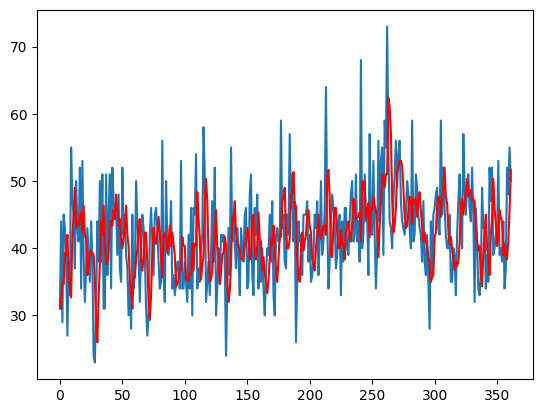

In [74]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


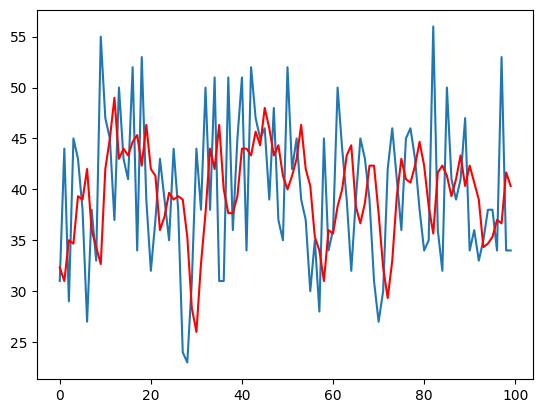

In [75]:
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()